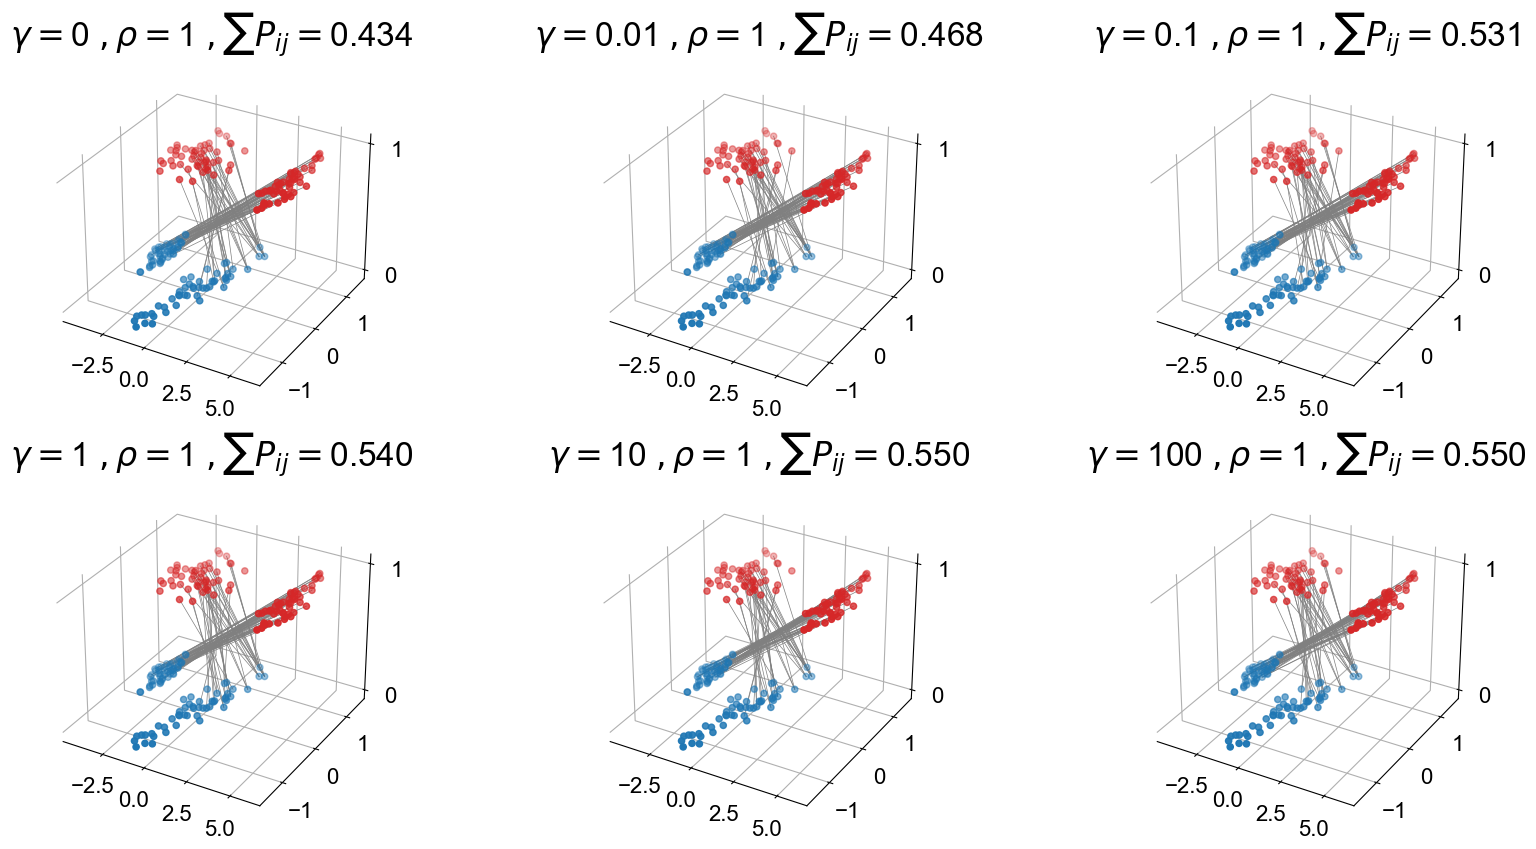

In [1]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import matplotlib.patches as mpatches
from scipy.spatial.distance import cdist
from mpl_toolkits.mplot3d import Axes3D
import scipy as sp
import sgw
import networkx as nx
import matplotlib as mpl
mpl.rcParams['font.size']=20
mpl.rcParams['font.sans-serif'] = "Arial"


random_state=1
np.random.seed(random_state) 
fig = plt.figure(figsize=(20, 10))



######################################
#######################################



###################################################
################################################# gamma=0 231
def generate_data(nsample, ratio):
    # Generate first ellipse
    s = np.random.uniform(size=(nsample, 3))
    x1 = np.zeros_like(s)
    x1[:, 0] = (
        np.sqrt(s[:, 0])
        * np.cos(2 * np.pi * s[:, 1])
        * np.cos(2 * np.pi * s[:, 2])
    )
    x1[:, 1] = 2 * np.sqrt(s[:, 0]) * np.sin(2 * np.pi * s[:, 1])
    x1[:, 2] = (
        np.sqrt(s[:, 0])
        * np.cos(2 * np.pi * s[:, 1])
        * np.sin(2 * np.pi * s[:, 2])
    )
    rot = 0.5 * np.sqrt(2) * np.array([[1, -1, 0], [1, 1, 0], [0, 0, 1]])
    x1 = x1.dot(rot)

    # Generate second circle
    s = np.random.uniform(size=(nsample, 3))
    x2 = np.zeros_like(s)
    x2[:, 0] = (
        np.sqrt(s[:, 0])
        * np.cos(2 * np.pi * s[:, 1])
        * np.cos(2 * np.pi * s[:, 2])
    )
    x2[:, 1] = np.sqrt(s[:, 0]) * np.sin(2 * np.pi * s[:, 1])
    x2[:, 2] = (
        np.sqrt(s[:, 0])
        * np.cos(2 * np.pi * s[:, 1])
        * np.sin(2 * np.pi * s[:, 2])
    )
    x2 = x2 + np.array([5.0, 0.0, 0.0])
    x = np.concatenate((x1, x2)) + np.array([0.0, 0.0, 8.0])

    # Generate second data drom translation
    y = np.concatenate((x1[:, :2], s[:, :2] + np.array([-4.0, 0.0])))
    angle = -np.pi / 4
    x[:nsample] = x[:nsample].dot(
        np.array(
            [
                [np.cos(angle), np.sin(angle), 0],
                [-np.sin(angle), np.cos(angle), 0],
                [0, 0, 1],
            ]
        )
    )
    y[nsample:] = (y[nsample:] - np.mean(y[nsample:], axis=0)).dot(
        np.array(
            [[np.cos(angle), np.sin(angle)], [-np.sin(angle), np.cos(angle)]]
        )
    ) + np.mean(y[nsample:], axis=0)

    # Generate weights
    a, b = np.ones(x.shape[0]) / x.shape[0], np.ones(y.shape[0]) / y.shape[0]
    b[:n1], b[n1:] = (1 - ratio) * b[:n1], ratio * b[n1:]
    b = b / np.sum(b)
    return a, x, b, y

n1 = 50
ratio = 0.7
a, x, b, y = generate_data(n1, ratio)
x = np.array(x)
y = np.array(y)

D1 = sp.spatial.distance.cdist(x, x)
D2 = sp.spatial.distance.cdist(y, y)




file_path = '3d_P_gamma_0_rho_1.csv'

data = pd.read_csv(file_path)

total_sum= "{:.3f}".format(data.values.sum())
    

gamma = 0
threshold = 1

P = np.loadtxt('3d_P_gamma_0_rho_1.csv', delimiter=',')
ax = fig.add_subplot(231, projection='3d')
ax.scatter(y[:, 0], y[:, 1], np.zeros(y.shape[0]), c='tab:blue', s=20)
ax.scatter(x[:, 0], x[:, 1], np.ones(x.shape[0]), c='tab:red', s=20)
ax.set_title(r'$\gamma=$' + str(gamma) + r' $, \rho=$' + str(threshold) + r' $, \sum P_{ij}=$' + str(total_sum))
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.set_zticks([0, 1])
ax.tick_params(axis='both', which='major', labelsize=16)
for i in range(P.shape[1]):
    if P[:, i].sum() < 1e-10: continue
    j = np.argmax(P[:, i])
    ax.plot3D([y[j, 0], x[i, 0]], [y[j, 1], x[i, 1]], [0, 1], c='gray', linewidth=0.5)
    
  
 
    
#################################################################    
#######################################################################gamma=0.01 232
gamma = 0.01
threshold = 1


file_path = '3d_P_gamma_0.01_rho_1.csv'

data = pd.read_csv(file_path)

total_sum= "{:.3f}".format(data.values.sum())



P = np.loadtxt('3d_P_gamma_0.01_rho_1.csv', delimiter=',')
ax = fig.add_subplot(232, projection='3d')
ax.scatter(y[:, 0], y[:, 1], np.zeros(y.shape[0]), c='tab:blue', s=20)
ax.scatter(x[:, 0], x[:, 1], np.ones(x.shape[0]), c='tab:red', s=20)
ax.set_title(r'$\gamma=$' + str(gamma) + r' $, \rho=$' + str(threshold) + r' $, \sum P_{ij}=$' + str(total_sum))
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.set_zticks([0, 1])
ax.tick_params(axis='both', which='major', labelsize=16)
for i in range(P.shape[1]):
    if P[:, i].sum() < 1e-10: continue
    j = np.argmax(P[:, i])
    ax.plot3D([y[j, 0], x[i, 0]], [y[j, 1], x[i, 1]], [0, 1], c='gray', linewidth=0.5)
    




###########################################################################
#######################################################################gamma=0.1 233
gamma = 0.1
threshold = 1


file_path = '3d_P_gamma_0.1_rho_1.csv'

data = pd.read_csv(file_path)

total_sum= "{:.3f}".format(data.values.sum())



P = np.loadtxt('3d_P_gamma_0.1_rho_1.csv', delimiter=',')
ax = fig.add_subplot(233, projection='3d')
ax.scatter(y[:, 0], y[:, 1], np.zeros(y.shape[0]), c='tab:blue', s=20)
ax.scatter(x[:, 0], x[:, 1], np.ones(x.shape[0]), c='tab:red', s=20)
ax.set_title(r'$\gamma=$' + str(gamma) + r' $, \rho=$' + str(threshold) + r' $, \sum P_{ij}=$' + str(total_sum))
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.set_zticks([0, 1])
ax.tick_params(axis='both', which='major', labelsize=16)
for i in range(P.shape[1]):
    if P[:, i].sum() < 1e-10: continue
    j = np.argmax(P[:, i])
    ax.plot3D([y[j, 0], x[i, 0]], [y[j, 1], x[i, 1]], [0, 1], c='gray', linewidth=0.5)


    
    
    
#############################################################################
#######################################################################gamma=1 234
gamma = 1
threshold = 1



file_path = '3d_P_gamma_1_rho_1.csv'

data = pd.read_csv(file_path)

total_sum= "{:.3f}".format(data.values.sum())



P = np.loadtxt('3d_P_gamma_1_rho_1.csv', delimiter=',')
ax = fig.add_subplot(234, projection='3d')
ax.scatter(y[:, 0], y[:, 1], np.zeros(y.shape[0]), c='tab:blue', s=20)
ax.scatter(x[:, 0], x[:, 1], np.ones(x.shape[0]), c='tab:red', s=20)
ax.set_title(r'$\gamma=$' + str(gamma) + r' $, \rho=$' + str(threshold) + r' $, \sum P_{ij}=$' + str(total_sum))
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.set_zticks([0, 1])
ax.tick_params(axis='both', which='major', labelsize=16)
for i in range(P.shape[1]):
    if P[:, i].sum() < 1e-10: continue
    j = np.argmax(P[:, i])
    ax.plot3D([y[j, 0], x[i, 0]], [y[j, 1], x[i, 1]], [0, 1], c='gray', linewidth=0.5)


#############################################################################
#######################################################################gamma=10 235
gamma = 10
threshold = 1


file_path = '3d_P_gamma_10_rho_1.csv'

data = pd.read_csv(file_path)

total_sum= "{:.3f}".format(data.values.sum())
    



P = np.loadtxt('3d_P_gamma_10_rho_1.csv', delimiter=',')
ax = fig.add_subplot(235, projection='3d')
ax.scatter(y[:, 0], y[:, 1], np.zeros(y.shape[0]), c='tab:blue', s=20)
ax.scatter(x[:, 0], x[:, 1], np.ones(x.shape[0]), c='tab:red', s=20)
ax.set_title(r'$\gamma=$' + str(gamma) + r' $, \rho=$' + str(threshold) + r' $, \sum P_{ij}=$' + str(total_sum))
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.set_zticks([0, 1])
ax.tick_params(axis='both', which='major', labelsize=16)
for i in range(P.shape[1]):
    if P[:, i].sum() < 1e-10: continue
    j = np.argmax(P[:, i])
    ax.plot3D([y[j, 0], x[i, 0]], [y[j, 1], x[i, 1]], [0, 1], c='gray', linewidth=0.5)

    
    
    
###################################################################################
#######################################################################gamma=100 236
gamma = 100
threshold = 1

file_path = '3d_P_gamma_100_rho_1.csv'

data = pd.read_csv(file_path)

total_sum= "{:.3f}".format(data.values.sum())



P = np.loadtxt('3d_P_gamma_100_rho_1.csv', delimiter=',')
ax = fig.add_subplot(236, projection='3d')
ax.scatter(y[:, 0], y[:, 1], np.zeros(y.shape[0]), c='tab:blue', s=20)
ax.scatter(x[:, 0], x[:, 1], np.ones(x.shape[0]), c='tab:red', s=20)
ax.set_title(r'$\gamma=$' + str(gamma) + r' $, \rho=$' + str(threshold) + r' $, \sum P_{ij}=$' + str(total_sum))
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.set_zticks([0, 1])
ax.tick_params(axis='both', which='major', labelsize=16)
for i in range(P.shape[1]):
    if P[:, i].sum() < 1e-10: continue
    j = np.argmax(P[:, i])
    ax.plot3D([y[j, 0], x[i, 0]], [y[j, 1], x[i, 1]], [0, 1], c='gray', linewidth=0.5)






    
  
##############################################
plt.savefig('3d_gamma.png')